拟合的二次函数为: f(x) = -0.33x^2 + 1.97x + -0.64, residue = 0.023904572186688212


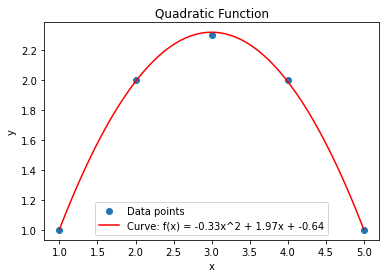

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_fit(x, y):
    """
    使用最小二乘法拟合二次函数 f(x) = ax^2 + bx + c

    参数：
        x: 数据点的 x 坐标 (n维数组)
        y: 数据点的 y 坐标 (n维数组)

    返回：
        a, b, c: 二次函数的系数
    """
    # 构造矩阵 A 和向量 B
    A = np.vstack([x**2, x, np.ones_like(x)]).T
    B = y

    # 求解线性方程组 A^T A [a, b, c]^T = A^T B
    # coefficients = np.linalg.lstsq(A, B, rcond=None)[0]
    # a, b, c = coefficients
    
    # 一维向量可以看做行向量或者列向量广播
    x =  np.linalg.inv(A.T @ A) @ A.T @ y
    r = y - A @ x
    norm_r = np.sqrt(r.T @ r)
    return x, norm_r

# 示例数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 2.3, 2 ,1])

# 拟合二次函数
[a, b, c] ,norm_r= quadratic_fit(x, y)
print(f"拟合的二次函数为: f(x) = {a:.2f}x^2 + {b:.2f}x + {c:.2f}, residue = {norm_r}")

# 绘制结果
x_fit = np.linspace(min(x), max(x), 100)
y_fit = a * x_fit**2 + b * x_fit + c

plt.scatter(x, y, label="Data points")
plt.plot(x_fit, y_fit, color='red', label=f"Curve: f(x) = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Quadratic Function")
plt.show()

numpy 的一维矩阵会自动进行调整为行或列向量进行运算。

In [26]:
x = np.array([1,2])
A = np.array([[1,2],[3,4]])
print(x@A, A@x)

[ 7 10] [ 5 11]


默认是行向量。

In [29]:
a = np.hstack(([1,2,3], [4,5,6]))
b = np.vstack(([1,2,3], [4,5,6]))
c = np.vstack(([1,2,3], [4,5,6])).T
print(a)
print(b)
print(c)

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


列向量需要手动调整。

In [30]:
arr = np.array([1, 2, 3])

# 转换为列向量
col_vector = arr.reshape(-1, 1)
print(col_vector)

[[1]
 [2]
 [3]]
